In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [3]:
#Carga de dataset
data = pd.read_csv('/content/pizza_v2.csv')

In [4]:
print(data)

    company price_rupiah  diameter      topping           variant     size  \
0         A    Rp235,000   22 inch      chicken  double_signature    jumbo   
1         A    Rp198,000   20 inch    papperoni  double_signature    jumbo   
2         A    Rp120,000   16 inch    mushrooms  double_signature  reguler   
3         A    Rp155,000   14 inch  smoked_beef  double_signature  reguler   
4         A    Rp248,000   18 inch   mozzarella  double_signature    jumbo   
..      ...          ...       ...          ...               ...      ...   
124       E     Rp39,000  8.5 inch         tuna        spicy tuna    small   
125       E     Rp72,000   12 inch         tuna        spicy tuna   medium   
126       E     Rp99,000   14 inch         tuna        spicy tuna    large   
127       E     Rp44,000  8.5 inch         meat   BBQ_meat_fiesta    small   
128       E     Rp78,000   12 inch         meat   BBQ_meat_fiesta   medium   

    extra_sauce extra_cheese extra_mushrooms  
0           yes 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [6]:
#Eliminamos el tipo de moneda "Rp" de la columna 'price_rupiah' y eliminamos la , para tener un strig para que se pueda convertir a float
data['price_rupiah'] = data['price_rupiah'].str.replace('Rp', '')
data['price_rupiah'] = data['price_rupiah'].str.replace(',', '')
#Eliminamos el inch de diameter para tener un valor que posteriormente se convierta a un float
data['diameter'] = data['diameter'].str.replace('inch', '')

In [7]:
print(data)

    company price_rupiah diameter      topping           variant     size  \
0         A       235000      22       chicken  double_signature    jumbo   
1         A       198000      20     papperoni  double_signature    jumbo   
2         A       120000      16     mushrooms  double_signature  reguler   
3         A       155000      14   smoked_beef  double_signature  reguler   
4         A       248000      18    mozzarella  double_signature    jumbo   
..      ...          ...      ...          ...               ...      ...   
124       E        39000     8.5          tuna        spicy tuna    small   
125       E        72000      12          tuna        spicy tuna   medium   
126       E        99000      14          tuna        spicy tuna    large   
127       E        44000     8.5          meat   BBQ_meat_fiesta    small   
128       E        78000      12          meat   BBQ_meat_fiesta   medium   

    extra_sauce extra_cheese extra_mushrooms  
0           yes          yes

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [9]:
#Convertimos a float los datos de las columnas price_rupiah y diameter
data['diameter'] = data['diameter'].astype(float)
data['price_rupiah'] = data['price_rupiah'].astype(float)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          129 non-null    object 
 1   price_rupiah     129 non-null    float64
 2   diameter         129 non-null    float64
 3   topping          129 non-null    object 
 4   variant          129 non-null    object 
 5   size             129 non-null    object 
 6   extra_sauce      129 non-null    object 
 7   extra_cheese     129 non-null    object 
 8   extra_mushrooms  129 non-null    object 
dtypes: float64(2), object(7)
memory usage: 9.2+ KB


In [11]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns
#variables fechas
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [12]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [13]:
#Fechas a numeros
for columna in columnas_fechas:
  data[columna] = pd.to_numeric(data[columna].map(datetime.timestamp))

In [14]:
#resultado
print(data)

     company  price_rupiah  diameter  topping  variant  size  extra_sauce  \
0          0      235000.0      22.0        2        8     1            1   
1          0      198000.0      20.0        7        8     1            1   
2          0      120000.0      16.0        5        8     4            1   
3          0      155000.0      14.0        9        8     4            1   
4          0      248000.0      18.0        4        8     1            1   
..       ...           ...       ...      ...      ...   ...          ...   
124        4       39000.0       8.5       10       16     5            1   
125        4       72000.0      12.0       10       16     3            1   
126        4       99000.0      14.0       10       16     2            1   
127        4       44000.0       8.5        3        0     5            1   
128        4       78000.0      12.0        3        0     3            0   

     extra_cheese  extra_mushrooms  
0               1                0  
1

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          129 non-null    int64  
 1   price_rupiah     129 non-null    float64
 2   diameter         129 non-null    float64
 3   topping          129 non-null    int64  
 4   variant          129 non-null    int64  
 5   size             129 non-null    int64  
 6   extra_sauce      129 non-null    int64  
 7   extra_cheese     129 non-null    int64  
 8   extra_mushrooms  129 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 9.2 KB


In [16]:
#Para facilitar el calculo movemos la columna 'price_rupiah' al final del dataset
columna_a_mover = data['price_rupiah']  # Extrae la columna que deseas mover
data.drop(columns=['price_rupiah'], inplace=True)  # Elimina la columna del DataFrame
data['price_rupiah'] = columna_a_mover  # Agrega la columna al final del DataFrame

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          129 non-null    int64  
 1   diameter         129 non-null    float64
 2   topping          129 non-null    int64  
 3   variant          129 non-null    int64  
 4   size             129 non-null    int64  
 5   extra_sauce      129 non-null    int64  
 6   extra_cheese     129 non-null    int64  
 7   extra_mushrooms  129 non-null    int64  
 8   price_rupiah     129 non-null    float64
dtypes: float64(2), int64(7)
memory usage: 9.2 KB


In [18]:
#Se selecciona a price_rupiah como el valor para Y
# Lectura de Datos
X = data.iloc[:, :8]
y = data.iloc[:, 8]
m = y.size

In [19]:
print(X)
print('*'*25)
print(y)

     company  diameter  topping  variant  size  extra_sauce  extra_cheese  \
0          0      22.0        2        8     1            1             1   
1          0      20.0        7        8     1            1             1   
2          0      16.0        5        8     4            1             1   
3          0      14.0        9        8     4            1             0   
4          0      18.0        4        8     1            1             0   
..       ...       ...      ...      ...   ...          ...           ...   
124        4       8.5       10       16     5            1             1   
125        4      12.0       10       16     3            1             1   
126        4      14.0       10       16     2            1             1   
127        4       8.5        3        0     5            1             0   
128        4      12.0        3        0     3            0             0   

     extra_mushrooms  
0                  0  
1                  0  
2     

In [20]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [21]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

     company  diameter  topping  variant  size  extra_sauce  extra_cheese  \
0          0      22.0        2        8     1            1             1   
1          0      20.0        7        8     1            1             1   
2          0      16.0        5        8     4            1             1   
3          0      14.0        9        8     4            1             0   
4          0      18.0        4        8     1            1             0   
..       ...       ...      ...      ...   ...          ...           ...   
124        4       8.5       10       16     5            1             1   
125        4      12.0       10       16     3            1             1   
126        4      14.0       10       16     2            1             1   
127        4       8.5        3        0     5            1             0   
128        4      12.0        3        0     3            0             0   

     extra_mushrooms  
0                  0  
1                  0  
2     

In [22]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [23]:
print(X)

[[ 1.         -1.43132011  2.76790034 ...  0.83508588  0.70710678
  -1.12390297]
 [ 1.         -1.43132011  2.15439665 ...  0.83508588  0.70710678
  -1.12390297]
 [ 1.         -1.43132011  0.92738929 ...  0.83508588  0.70710678
   0.88975652]
 ...
 [ 1.          1.3662601   0.31388561 ...  0.83508588  0.70710678
   0.88975652]
 [ 1.          1.3662601  -1.37324952 ...  0.83508588 -1.41421356
   0.88975652]
 [ 1.          1.3662601  -0.29961808 ... -1.19748163 -1.41421356
   0.88975652]]


In [24]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [25]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [82818.66984866 -8042.62881758 29243.23575474  2008.90373365
 -1331.03182133 -4657.3541646   5983.52449801  -603.07936181
  1775.65753978]
El valor predecido es (usando el descenso por el gradiente): 389750.6633


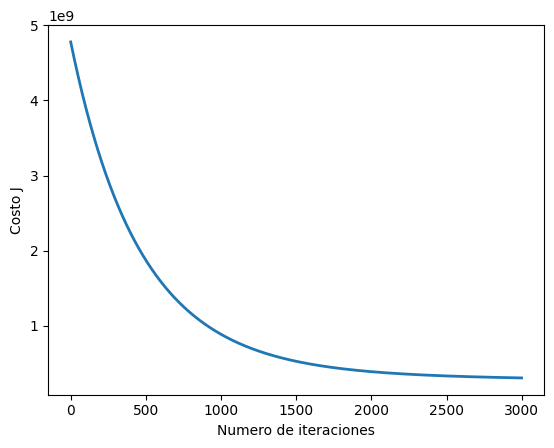

In [43]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 3000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(9)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# # Estimar el precio para una pizza con diferentes caracteristicas
X_array = [4, 0, 18.0, 9, 8, 0, 0, 1, 0]
X_array[1:9] = (X_array[1:9] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(price))

In [27]:
X_array = [4, 0, 18.0, 9, 8, 0, 0, 1, 0]
X_array[1:9] = (X_array[1:9] - mu) / sigma

In [28]:
X_array[1:9]

[-1.431320106991182,
 1.540892970013871,
 1.160652388674935,
 -0.029558902630266178,
 -1.9581928083213995,
 -1.1974816341601835,
 0.7071067811865476,
 -1.1239029738980326]

In [29]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [37]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una pizza con diferentes caracteristicas
price = np.dot(X_array, theta)

print('Estimar el precio para una Pizza con distintas caracteristicas (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [87151.1627907  -4435.21236659 51178.80772565  3547.27016952
 -1110.24636502 16918.65216038  2808.79175438   544.42767175
  1324.61513564]
Estimar el precio para una Pizza con distintas caracteristicas (usando la ecuación de la normal): $400367
